<a href="https://colab.research.google.com/github/Dimitrije-Corlija/PPPO_IT_24_2018/blob/main/PPPO_Dimitrije_Corlija_IT24_2018_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student:** Dimitrije Čorlija IT24/2018

**Tema:** Generative Adversarial Networks (GAN)

**Uvod:**
Tema koja je obrađivana u okviru projektnog zadatka je GAN-Generative Adversarial Networks. GAN predstavlja pristup generativnom modeliranju koristeći metode dubokog učenja, kao što su konvolucione neuronske mreže. Cilj ovog istraživanja je upotrebiti GAN(O kome ćemo reći nešto više u nastavku) na određenom setu podataka.

**GAN:**
Generativno modeliranje je zadatak učenja bez nadzora u mašinskom učenju koji uključuje automatsko otkrivanje i učenje pravilnosti ili obrazaca u ulaznim podacima na takav način da se model može koristiti za generisanje ili izlaz novih primera koji su verovatno mogli biti izvučeni iz originalnog skupa podataka. GAN-ovi predstavljaju pametan način obuke generativnog modela tako što se problem uokviruje kao problem učenja pod nadzorom sa dva podmodela: model generatora koji obučavamo da generiše nove primere i model diskriminatora koji pokušava da klasifikuje primere kao stvarne (iz domena) ili lažno (generisano). Opšti nazivi za ove modele su Generator i Diskriminator i smatraju se gradivnim blokovima koji stoje iza teorije GAN-ova. Dva modela se zajedno, sve dok model diskriminatora ne bude prevaren, što znači da model generatora generiše uverljive primere. GAN-ovi su uzbudljivo polje koje se brzo menja, pružajući obećanje generativnih modela u svojoj sposobnosti da generišu realistične primere u nizu problematičnih domena, posebno u zadacima prevođenja slike u sliku kao što je prevođenje fotografija leta u zimu ili dan do noći, i u generisanju fotorealističnih fotografija objekata, scena i ljudi za koje čak ni ljudi ne mogu da prepoznaju da su lažni. Na primer, mogu da kreiraju slike koje izgledaju kao fotografije ljudskih lica, iako lica ne pripadaju nijednoj stvarnoj osobi. Generatorska mreža uzima kao ulaz jednostavan N-dimenzionalni vektor nasumičnog šuma i transformiše ga prema naučenoj ciljnoj distribuciji. Njegov izlaz je takođe N-dimenzionalan. Diskriminator sa druge strane modelira funkciju raspodele verovatnoće (poput klasifikatora) i daje verovatnoću da je ulazna slika stvarna ili lažna [0, 1]. Imajući ovo na umu, možemo definisati dva glavna cilja zadatka generisanja:

1.Obučiti generator da maksimizira diskriminatorovu konačnu grešku u klasifikaciji. (Tako da se generisane slike percipiraju kao stvarne).

2.Obučiti diskriminator da minimizira konačnu grešku u klasifikaciji. (Tako da se pravi podaci pravilno razlikuju od lažnih podataka).



**Kako funkcionišu GAN-ovi:**
Prvi korak u uspostavljanju GAN-a je identifikacija željenog krajnjeg rezultata i prikupljanje početnog skupa podataka na osnovu tih parametara. Ovi podaci se zatim randomiziraju i unose u generator dok ne steknu osnovnu tačnost u stvaranju rezultata.Posle toga, generisane slike se unose u diskriminator zajedno sa stvarnim tačkama podataka iz originalnog koncepta. Diskriminator filtrira informacije i vraća verovatnoću između 0 i 1 da bi prikazao autentičnost svake slike (1 korelira sa stvarnom, a 0 korelira sa lažnom). Zatim se ove vrednosti ručno proveravaju za uspeh i ponavljaju dok se ne postigne željeni ishod.


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p" -O all-dogs.zip && rm -rf /tmp/cookies.txt

--2022-09-04 22:22:30--  https://docs.google.com/uc?export=download&confirm=t&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p
Resolving docs.google.com (docs.google.com)... 173.194.194.113, 173.194.194.101, 173.194.194.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mhohgr1aaf0dgf4jbd6gshpb2fe7hvab/1662330150000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=1fce18a2-3eb9-475c-8761-682568997699 [following]
--2022-09-04 22:22:30--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mhohgr1aaf0dgf4jbd6gshpb2fe7hvab/1662330150000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=1fce18a2-3eb9-475c-8761-682568997699
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 172.253.119.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p" -O Annotation.zip && rm -rf /tmp/cookies.txt

--2022-09-04 22:22:40--  https://docs.google.com/uc?export=download&confirm=t&id=1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p
Resolving docs.google.com (docs.google.com)... 173.194.194.113, 173.194.194.101, 173.194.194.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.194.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mhohgr1aaf0dgf4jbd6gshpb2fe7hvab/1662330150000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=a55c37b7-5c9d-4cbd-823f-4e452359bea8 [following]
--2022-09-04 22:22:41--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mhohgr1aaf0dgf4jbd6gshpb2fe7hvab/1662330150000/06049624160957438625/*/1tKOTjbtdxS-pzw80JHN-2FUiZA7htL7p?e=download&uuid=a55c37b7-5c9d-4cbd-823f-4e452359bea8
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 172.253.119.

In [ ]:
!unzip Annotation.zip

Streaming output truncated to the last 5000 lines.
  inflating: Annotation/n02088094-Afghan_hound/n02088094_5285  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_5285  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_4501  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_4501  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_13442  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_13442  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_8764  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_8764  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3982  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3982  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_3949  
  inflating: __MACOSX/Annotation/n02088094-Afghan_hound/._n02088094_3949  
  inflating: Annotation/n02088094-Afghan_hound/n02088094_1410  
  inflating: __MACOSX/Annotation/n02088094-Afghan

In [ ]:
!unzip all-dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: all-dogs/n02113624_8890.jpg  
  inflating: all-dogs/n02107683_215.jpg  
  inflating: all-dogs/n02093428_5326.jpg  
  inflating: all-dogs/n02105412_8018.jpg  
  inflating: all-dogs/n02093647_3129.jpg  
  inflating: all-dogs/n02088466_8078.jpg  
  inflating: all-dogs/n02108915_4214.jpg  
  inflating: all-dogs/n02089078_2841.jpg  
  inflating: all-dogs/n02105855_3498.jpg  
  inflating: all-dogs/n02094114_2823.jpg  
  inflating: all-dogs/n02088094_649.jpg  
  inflating: all-dogs/n02091831_2232.jpg  
  inflating: all-dogs/n02096585_3105.jpg  
  inflating: all-dogs/n02109961_977.jpg  
  inflating: all-dogs/n02097047_5869.jpg  
  inflating: all-dogs/n02106030_16250.jpg  
  inflating: all-dogs/n02110958_13721.jpg  
  inflating: all-dogs/n02107142_8437.jpg  
  inflating: all-dogs/n02094433_1312.jpg  
  inflating: all-dogs/n02097474_5481.jpg  
  inflating: all-dogs/n02097130_1531.jpg  
  inflating: all-dogs/n02092339_284.jpg  
  inf

**Uvoz potrebnih biblioteka**

Prva biblioteka koju ćemo uvesti je **Numpy**. *Numpy* predstavlja Python biblioteku koja se koristi za lakše baratanje matematičkim operacijama i izrazima, čime predstavlja dobru zamenu za MatLab. Ona nudi višedimenzionalni objekat niza, kao i razne izvedene objekte i asortiman rutina za brže operacije nad nizovima.U kombinaciji sa bibliotekom Matplotlib, predstavlja odličan alat za statističke proračune i njihovo grafičko predstavljanje. Pored toga, biblioteka *NumPy* je korisna za backend programiranje u kombinaciji sa bibliotekom Pandas. Prednost *Numpy* je njihova brzina obrade nizova u odnosu na liste koje se dosta sporije obrađuju. Osim ove biblioteke veoma je važna implementacija **Os modula** u Python-u, čija je uloga da pruži funkcije za interakciju sa operativnim sistemom. *OS* dolazi pod Python-ovim standardnim uslužnim modulima. Ovaj modul pruža prenosni način korišćenja funkcionalnosti zavisne od operativnog sistema.* Moduli os i os.path* uključuju mnoge funkcije za interakciju sa sistemom datoteka. Nakon implementacije *Os modula* potrebno je implementirati **cv2(OpenCV) biblioteku Python-a**.*OpenCV* je besplatna biblioteka strojnog vida na više platformi( OS X, Windows i Android) koju je prvobitno bio razvio Intel i koristila se u bezbroj aplikacija(od sigurnosnih sistema s detekcijom pokreta, do obrade kontrolnih aplikacija tamo gdje je potrebno prepoznavanje objekata). Poznata metoda OpenCV-a je cv2.imread () metoda, koja  učitava sliku iz navedene datoteke. Ako se slika ne može pročitati (zbog nedostajuće datoteke, nepravilnih dozvola, nepodržanih ili nevaljanih formata), onda ovaj metod vraća praznu matricu. Poslednja importovana biblioteka jeste **Keras**. To je biblioteka neuronskih mreža na visokom nivou koja radi na vrhu TensorFlov-a, CNTK-a i Theano-a. Korišćenje *Kerasa* u dubokom učenju omogućava lako i brzo izradu prototipova, kao i neometano pokretanje na CPU i GPU. Ovaj okvir je napisan u Python kodu koji je lak za otklanjanje grešaka i omogućava jednostavnost proširivosti. Ono zbog čega se *Keras* najčešće koristi jeste klasifikacija slika.





In [ ]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model
from keras.layers import Dense, LeakyReLU, Reshape, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Conv2DTranspose

from tensorflow.keras.layers import BatchNormalization

Potrebno je svakoj fotografiji dodeliti odgovarajući naziv rase. Da bi se tako nešto uradilo potrebno je uz pomoću anotacija kreirati rečnik koji mapira šifru rase u nazivu u stvarno ime rase. Anotacije je potrebno splitovati po karakteru kako bismo dobili pravi naziv odogarajuće rase koje smeštamo u rečnik podataka. U narednoj liniji koda dat je prikaz malopre pomenutih koraka.

In [ ]:
dog_breed_dict = {}
for annotation in os.listdir('Annotation'):
    annotations = annotation.split('-')
    dog_breed_dict[annotations[0]] = annotations[1]

Fotografije koje smo dobili potrebno je transformisati i to radimo pomoću **RGB**. *RGB* je aditivni model boja kod kojeg se sabiranjem tri osnovne boje na različite načine dobijaju sve ostale boje.

In [ ]:
def read_image(src='all-dogs'):
    img = cv2.imread(src)
    if img is None:
        print(src)
        raise FileNotFoundError
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

 U nastavku će biti kreirana funkcija koja će prikazati fotografiju psa sa ispisom rase psa.

In [ ]:
import math

def plot_features(features, labels, image_width=64, image_height=64, image_channels=5,
examples=25, disp_labels=True): 
  
    if not math.sqrt(examples).is_integer():
        print('Please select a valid number of examples.')
        return
    imgs = []
    classes = []
    for i in range(examples):
        rnd_idx = np.random.randint(0, len(labels))
        imgs.append(features[rnd_idx])
        classes.append(labels[rnd_idx])
    fig, axes = plt.subplots(round(math.sqrt(examples)), round(math.sqrt(examples)),figsize=(15,15),
    subplot_kw = {'xticks':[], 'yticks':[]},
    gridspec_kw = dict(hspace=0.3, wspace=0.03))
    
    for i, ax in enumerate(axes.flat):
        if disp_labels == True:
            ax.title.set_text(classes[i])
        ax.imshow(imgs[i])

U narednoj liniji koda će biti prikazani rezultati funkcije koja je kreirana u koraku pre.

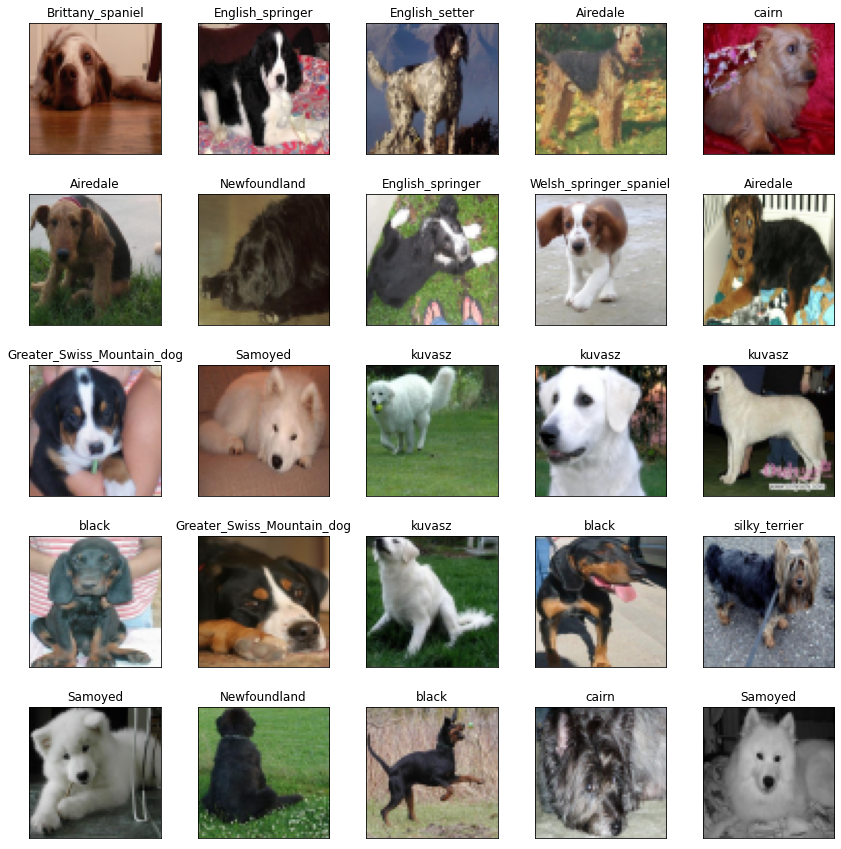

In [ ]:
plot_features(dog_images_np, breeds, examples=25, disp_labels=True)

U koraku koji sledi potrebno je kreirati GAN klasu, generatore, diskriminatore, kao i aktivirati generatore.Zatim je potrebno kreirati funkciju za trening , kojoj je potrebno proslediti parametre(fotografija, broj epoha, broj serija koje definišu za koliko epoha se ispisuje rezultat gubitka generatora i diskriminatora)

**Diskriminator** **-**  se koristi za optimizaciju funkcije gubitka, koja se sastoji od zbira stvarnih i lažnih gubitaka, implementiranih od strane funkcija ***real_loss()*** i ***fake_loss()***.

**Generator -**  se koristi za optimizaciju stvarnih gubitaka, sa ciljem da zavara diskriminator, čineći da generisana fotografija sve više liči na stvarne fotografije.

In [ ]:
class GAN():
    def __init__(self):
        self.img_shape = (64, 64, 3)
        
        self.noise_size = 100

        optimizer = Adam(0.0002,0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined = Sequential()
        self.combined.add(self.generator)
        self.combined.add(self.discriminator)
        
        self.discriminator.trainable = False
        
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
        self.combined.summary()
        
    # Kreiranje generatora
    def build_generator(self):
        epsilon = 0.00001 
        noise_shape = (self.noise_size,)
        
        model = Sequential()
        
        model.add(Dense(4*4*512, activation='linear', input_shape=noise_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Reshape((4, 4, 512)))
        
        model.add(Conv2DTranspose(512, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(256, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(128, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(64, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
        model.add(BatchNormalization(momentum=0.9, epsilon=epsilon))
        model.add(LeakyReLU(alpha=0.2))
        
        model.add(Conv2DTranspose(3, kernel_size=[4,4], strides=[1,1], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))

        
        model.add(Activation("tanh"))
        
        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

   # Kreiranje diskriminatora
    def build_discriminator(self):

        model = Sequential()

        model.add(Conv2D(128, (3,3), padding='same', input_shape=self.img_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.2))

        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(Conv2D(128, (3,3), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(3,3)))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(128))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        
        model.summary()
        
        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

        
   # Funkcija za trening
    def train(self, epochs, batch_size=128, metrics_update=50, save_images=100, save_model=2000):

        X_train = np.array(dog_images_np)
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5

        half_batch = int(batch_size / 2)
        
        mean_d_loss=[0,0]
        mean_g_loss=0

        for epoch in range(epochs):
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, self.noise_size))
            gen_imgs = self.generator.predict(noise)

            # Trening diskriminatora
            d_loss = 0.5 * np.add(self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1))),
                                  self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1))))

             # Trening generatora
            noise = np.random.normal(0, 1, (batch_size, self.noise_size))

            valid_y = np.array([1] * batch_size)
            g_loss = self.combined.train_on_batch(noise, valid_y)
            
            mean_d_loss[0] += d_loss[0]
            mean_d_loss[1] += d_loss[1]
            mean_g_loss += g_loss

           
            if epoch % metrics_update == 0:
                print ("%d [Discriminator loss: %f, acc.: %.2f%%] [Generator loss: %f]" % (epoch, mean_d_loss[0]/metrics_update, 100*mean_d_loss[1]/metrics_update, mean_g_loss/metrics_update))
                mean_d_loss=[0,0]
                mean_g_loss=0
            
            # Čuvanje 25 fotografija
            if epoch % save_images == 0:
                self.save_images(epoch)
            
            # Čuvamo arhitekturu modela, težine i stanje optimizatora
            if epoch % save_model == 0:
                self.generator.save("generator_%d" % epoch)
                self.discriminator.save("discriminator_%d" % epoch)

    def save_images(self, epoch):
        noise = np.random.normal(0, 1, (25, self.noise_size))
        gen_imgs = self.generator.predict(noise)
        
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(5,5, figsize = (8,8))

        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[5*i+j])
                axs[i,j].axis('off')

        plt.show()
        
        fig.savefig("dogGenerated/Faces_%d.png" % epoch)
        plt.close()

In [ ]:
!mkdir dogGenerated

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 128)       0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 128)      512       
 hNormalization)                                        

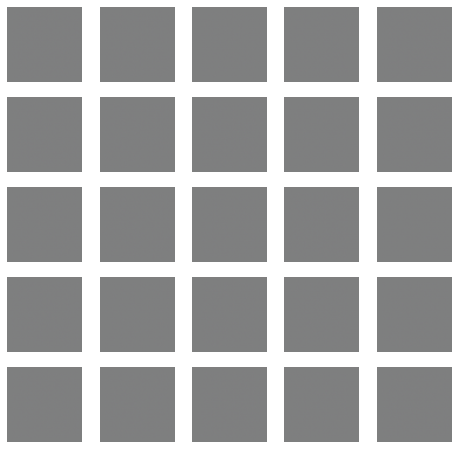

20 [Discriminator loss: 0.208414, acc.: 91.74%] [Generator loss: 0.465908]


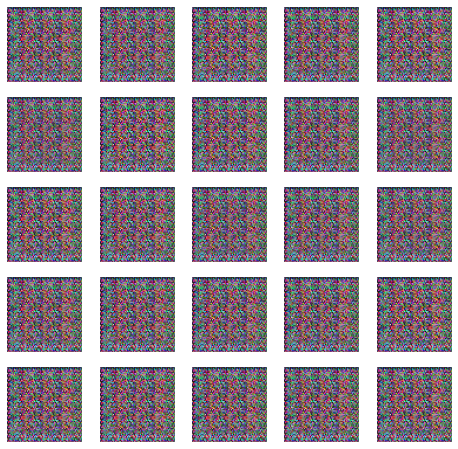

40 [Discriminator loss: 0.020256, acc.: 99.69%] [Generator loss: 0.153207]
60 [Discriminator loss: 0.003208, acc.: 100.00%] [Generator loss: 0.031969]


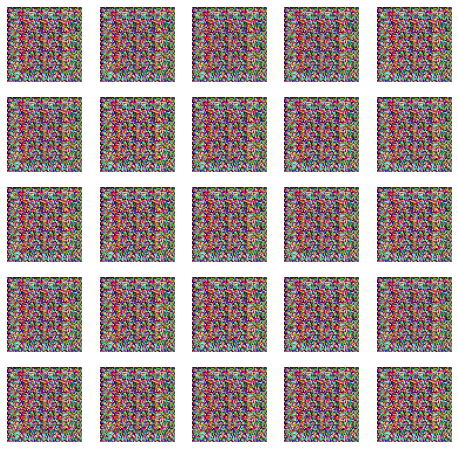

80 [Discriminator loss: 0.001330, acc.: 100.00%] [Generator loss: 0.007361]


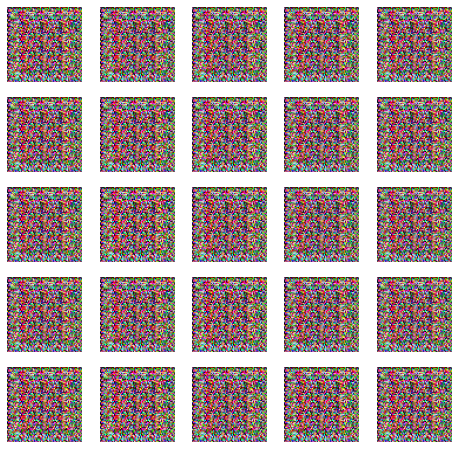

100 [Discriminator loss: 0.000664, acc.: 100.00%] [Generator loss: 0.001489]
120 [Discriminator loss: 0.000384, acc.: 100.00%] [Generator loss: 0.000344]


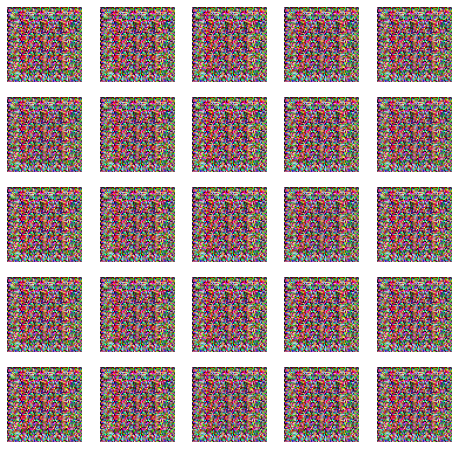

140 [Discriminator loss: 0.000289, acc.: 100.00%] [Generator loss: 0.000102]


In [ ]:
gan=GAN()
gan.train(epochs=150, batch_size=256, metrics_update=20, save_images=30, save_model=150)

**Zaključak**

 Iako je GAN obuka dosta zanimljiva i korisna, ona je dosta teška i tome svedoče naredni razlozi:

**1.Slom režima**- dešava se kada generator nauči da proizvodi uzorke koji odgovaraju samo delu stvarne distribucije tokom obuke.

**2.Slab gradijent**- često dolazi do toga da obuka postaje veoma teška kada su stvarna i lažna distribucija veoma udaljene jedna od druge. Sa orginalnim ciljem GAN obuka postaje gotovo nemoguća jer je generator prima vrlo slab gradijent signal od diskriminatora.

**3.Nestabilnost**- obuka diskriminatora često zna da bude nestabilna jer dolazi do postavljanja  dve neuronske mreže jedne protiv druge sa ciljem da obe mreže dostignu ravnotežu. Ovo je snažna pretpostavka posebno zato što ne postoji garancija da će ažuriranja gradijenta dovesti do konvergencije. Poznato je da kontradiktorni ciljevi mogu dovesti do nasumičnih oscilacija.


Ono što je još korišćeno za izradu ovog projekta i što se preporučuje prilikom pokretanja ovog koda jeste prebacivanje *Hardware accelerator-a* na GPU, čime je povećana brzina obrade podataka za preko 29x. 
Osim običnog GAN-a postoji i BigGAN, koji je znatno nadmašio običan GAN u pogledu performansi.Google Colab je omogućio smanjenje vremena obuke, što je omogućilo bržu iteraciju za podešavanje modela. Zahvaljujući strukturisanom skupu podataka u kome su slike pasa isečene i bez pozadine koja ometa – moglo bi doći do boljih performansi generatora, jer bi raspodela karakteristika svake slike bila više manje ista.



**Literatura**

Osim literature sa vežbi, za izradu ovog projekta su korišćeni materijali sa sledećih linkova:

1. https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/

2. https://alas.matf.bg.ac.rs/~mv11141/#0

3. https://blog.desdelinux.net/bs/opencv-biblioteka-za-prepoznavanje-objekata-na-slikama-i-kamerama/

4. https://saveti.kombib.rs/python-nedeljni-pregled-flask-for-python

5. https://sr.wikipedia.org/wiki/RGB

6. https://developers.google.com/machine-learning/gan

